In [7]:
import pandas as pd
import numpy as np

# Verileri yüklüyoruz
df = pd.read_csv("Desktop/household_power_consumption.txt", sep=';', 
                 parse_dates=[[0, 1]], infer_datetime_format=True, 
                 na_values='?', low_memory=False)

# Sütun adlarını ayarlıyoruz(Date ile time sütununu birleştirdik )
df.columns = ['Datetime', 'Global_active_power', 'Global_reactive_power',
              'Voltage', 'Global_intensity', 'Sub_metering_1',
              'Sub_metering_2', 'Sub_metering_3']

# Eksik verileri siliyoruz
df.dropna(inplace=True)

# Tarih sırasına göre sıralıyoruz
df.sort_values('Datetime', inplace=True)

# Datetime'ı indeks yaptık
df.set_index('Datetime', inplace=True)

# Saatlik ortalama hesapla (tüm sayısal sütunlar için)
hourly_df = df.resample('H').mean()

# Eksik verileri yine temizle
hourly_df.dropna(inplace=True)

# İlk 10000 satırı seç
final_df = hourly_df.head(10000)

# CSV dosyası olarak kaydet
final_df.to_csv("electricity_consumption_10k.csv")

# Kontrol(işlemin başarılı olup olmadığını öğreniyoruz)
print("Veri dışa aktarıldı:", final_df.shape)

/var/folders/7c/k2spgvwx0lj4j25_j9jb1xyr0000gn/T/ipykernel_70303/2558759172.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("Desktop/household_power_consumption.txt", sep=';',
/var/folders/7c/k2spgvwx0lj4j25_j9jb1xyr0000gn/T/ipykernel_70303/2558759172.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("Desktop/household_power_consumption.txt", sep=';',


Veri dışa aktarıldı: (10000, 7)


/var/folders/7c/k2spgvwx0lj4j25_j9jb1xyr0000gn/T/ipykernel_70303/2558759172.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("Desktop/household_power_consumption.txt", sep=';',
/var/folders/7c/k2spgvwx0lj4j25_j9jb1xyr0000gn/T/ipykernel_70303/2558759172.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').mean()


In [8]:
# 10000 satırlık csv dosyasını okuyoruz
df = pd.read_csv("electricity_consumption_10k.csv")



In [9]:
# baştan ilk 5 veriyi görüntülüyoruz
df.head()


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [10]:
# Sondan 5 veriyi görüntülüyoruz
df.tail()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
9995,2008-02-08 18:00:00,1.707400,0.124933,234.957500,7.363333,0.0,0.516667,0.0
9996,2008-02-08 19:00:00,1.574600,0.071200,237.241500,6.723333,0.0,0.100000,0.0
9997,2008-02-08 20:00:00,1.263800,0.044167,237.959000,5.420000,0.0,0.000000,0.0
9998,2008-02-08 21:00:00,1.258933,0.097333,238.576000,5.460000,0.0,0.383333,0.0
9999,2008-02-08 22:00:00,2.007733,0.082133,239.261167,8.440000,0.0,0.216667,0.0


In [11]:
# Verilerle ilgili bilgiler 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datetime               10000 non-null  object 
 1   Global_active_power    10000 non-null  float64
 2   Global_reactive_power  10000 non-null  float64
 3   Voltage                10000 non-null  float64
 4   Global_intensity       10000 non-null  float64
 5   Sub_metering_1         10000 non-null  float64
 6   Sub_metering_2         10000 non-null  float64
 7   Sub_metering_3         10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


In [12]:
# verilerin boyutu 
df.shape

(10000, 8)

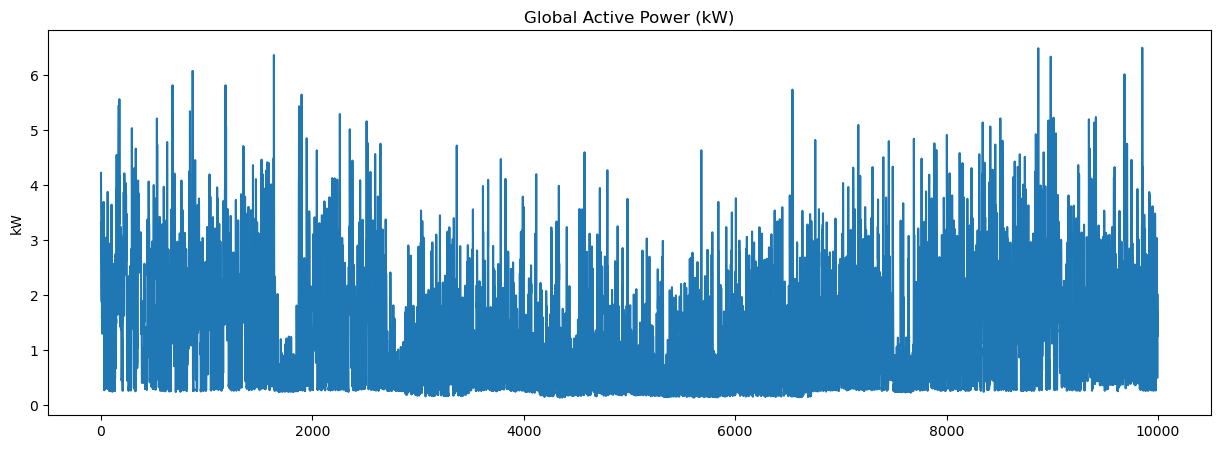

In [19]:
import matplotlib.pyplot as plt

# Global active power'ı grafik üzerinde gösteriyoruz
df['Global_active_power'].plot(figsize=(15, 5), title='Global Active Power (kW)')
plt.ylabel('kW')
plt.show()


# Lineer Regrasyon

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Veriyi okuyoruz
df = pd.read_csv("electricity_consumption_10k.csv")

# Datetime sütununu siliyoruz
if 'Datetime' in df.columns:
    df = df.drop(columns=['Datetime'])

# Eksik verileri kontrol edip temizliyoruz
df.dropna(inplace=True)

# Bağımlı ve bağımsız değişkenleri belirliyoruz 
X = df.drop(columns=['Global_active_power'])  # Bağımsız değişkenler
y = df['Global_active_power']                 # Bağımlı değişkenler


In [26]:
from sklearn.preprocessing import MinMaxScaler

features = [
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

X = df[features]
y = df["Global_active_power"]

# Ölçekleyiciyi oluşturduk (kullanıcıdan veri almak için)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lineer regrasyonda test oluşturuyoruz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli oluşturup eğitiyoruz
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

RMSE: 0.02162740454074836
R²: 0.9995751665618379


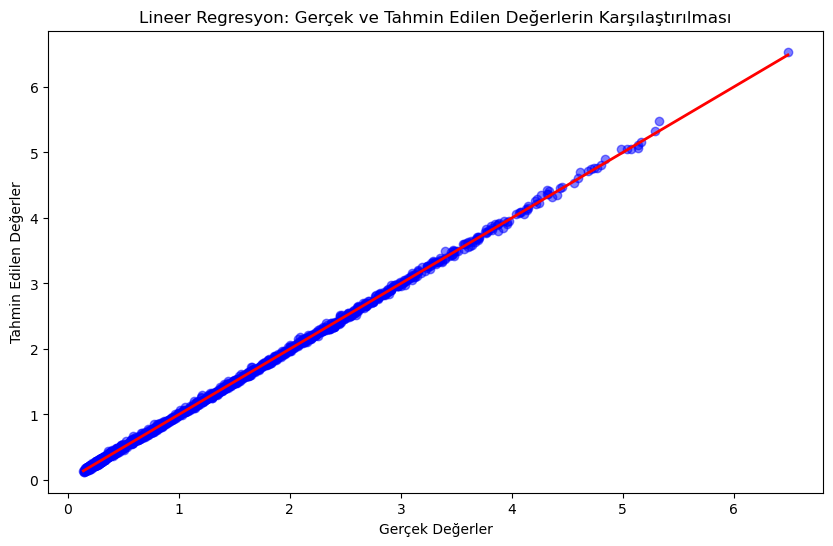

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Test verisi üzerinde tahmin yapıyoruz
y_pred = lr_model.predict(X_test)

# RMSE ve R² hesaplama (Modelin verimliliğini öğrenmek için)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Lineer Regresyon: Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması")
plt.show()


In [32]:
# Kullanıcıdan verileri isteyip tahmin yaptırıyoruz
inputs = []
for feature in features:
    val = float(input(f"{feature} değeri: "))
    inputs.append(val)

user_input = np.array([inputs])
user_input_scaled = scaler.transform(user_input)

prediction = lr_model.predict(user_input_scaled)
print("\nTahmin edilen Global_active_power:", prediction[0])



Global_reactive_power değeri:  0.080033
Voltage değeri:  234.580167
Global_intensity değeri:  15.600000
Sub_metering_1 değeri:  0.0
Sub_metering_2 değeri:  6.716667
Sub_metering_3 değeri:  16.866667



Tahmin edilen Global_active_power: 3.707145219773156


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


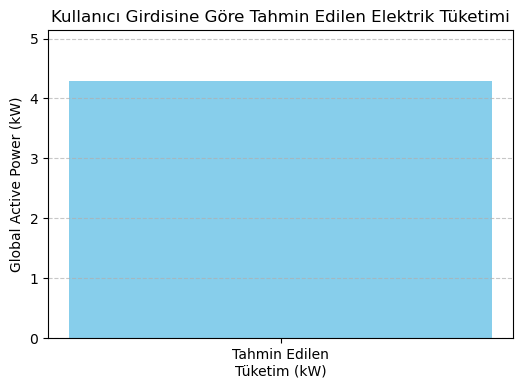

In [206]:
import matplotlib.pyplot as plt

# Kullanıcıdan alınan verilerle yapılan tahminin tabloda gösterimi
plt.figure(figsize=(6, 4))
plt.bar(["Tahmin Edilen\nTüketim (kW)"], [prediction[0]], color='skyblue')
plt.title("Kullanıcı Girdisine Göre Tahmin Edilen Elektrik Tüketimi")
plt.ylabel("Global Active Power (kW)")
plt.ylim(0, max(1.5, prediction[0] * 1.2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [208]:
y_pred = model.predict(X_test)

# Hata metrikleri
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))


RMSE: 2.4036
R²: -4.2474


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


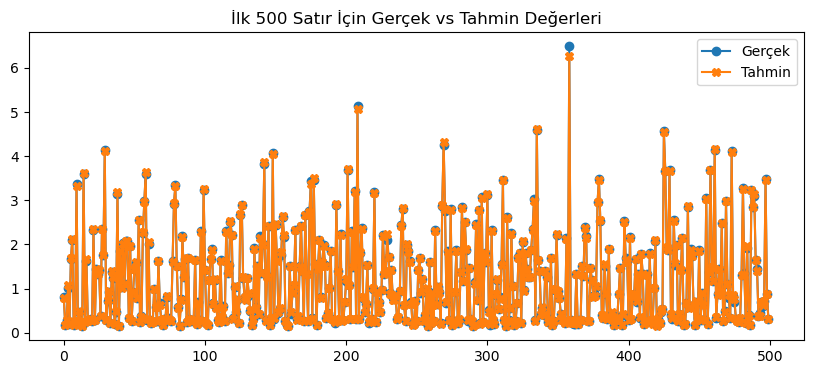

In [251]:
import matplotlib.pyplot as plt

# ilk 500 satır içim gerçek değerlerle tahmin değerlerinin karşılaştırılması 
plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:500], label='Gerçek', marker='o')
plt.plot(y_pred[:500], label='Tahmin', marker='X')
plt.title("İlk 500 Satır İçin Gerçek vs Tahmin Değerleri")
plt.legend()
plt.show()


In [212]:
# Katsayılar (a değerleri)
coefficients = model.coef_

# Sabit terim (b değeri)
intercept = model.intercept_

# Sütun isimleri ile eşleştir
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.6f}")
# Lineer regrasyon modelindeki denklemdeki katsayıları öğreniyoruz 
print(f"\nSabit terim (b): {intercept:.6f}")


Global_reactive_power: -0.175380
Voltage: 0.004090
Global_intensity: 0.238895
Sub_metering_1: -0.001271
Sub_metering_2: -0.000908
Sub_metering_3: 0.001676

Sabit terim (b): -0.987083


# Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest regresyon modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitiyoruz
rf_model.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred_rf = rf_model.predict(X_test)

# Performans ölçümleri
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", round(rf_rmse, 4))
print("Random Forest R²:", round(rf_r2, 4))

Random Forest RMSE: 0.0212
Random Forest R²: 0.9996


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


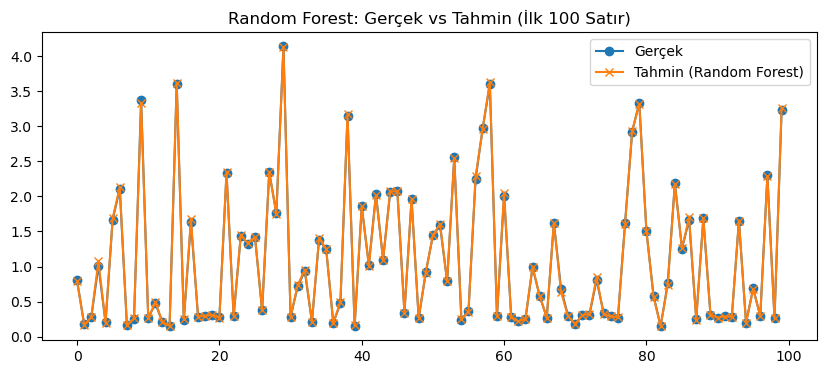

In [216]:
# ilk 100 satır için karşılaşrmaların gösterimi
plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:100], label='Gerçek', marker='o')
plt.plot(y_pred_rf[:100], label='Tahmin (Random Forest)', marker='x')
plt.title("Random Forest: Gerçek vs Tahmin (İlk 100 Satır)")
plt.legend()
plt.show()


In [217]:
# Lineer Regresyon ve Random Forest modellerinin hata metriklerinin karşılaştırılması
print("Random Forest RMSE:", round(rf_rmse, 4))
print("Random Forest R²:", round(rf_r2, 4))

print("Lineer Regresyon RMSE:", round(lr_rmse, 4))
print("Lineer Regresyon R²:", round(lr_r2, 4))


Random Forest RMSE: 0.0212
Random Forest R²: 0.9996
Lineer Regresyon RMSE: 0.0246
Lineer Regresyon R²: 0.9994


# KNN

In [222]:
from sklearn.neighbors import KNeighborsRegressor

# KNN modelini oluşturuyoruz
knn_model = KNeighborsRegressor(n_neighbors=5)

# Modeli eğitiyoruz
knn_model.fit(X_train, y_train)

# Tahmin yapıyporuz
y_pred_knn = knn_model.predict(X_test)

# Performans ölçümleri
knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
knn_r2 = r2_score(y_test, y_pred_knn)

print("KNN RMSE:", round(knn_rmse, 4))
print("KNN R²:", round(knn_r2, 4))

KNN RMSE: 0.1287
KNN R²: 0.985


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# SVR (Support Vector Regression)

In [225]:
from sklearn.svm import SVR

# SVR modelini oluşturuyoruz
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Modeli eğitiyoruz
svr_model.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred_svr = svr_model.predict(X_test)

# Performans ölçümleri
svr_rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
svr_r2 = r2_score(y_test, y_pred_svr)

print("SVR RMSE:", round(svr_rmse, 4))
print("SVR R²:", round(svr_r2, 4))

SVR RMSE: 0.0482
SVR R²: 0.9979


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Gradient Boosting (GBoost)

In [343]:
# xgboost un kurulumu
pip install xgboost

SyntaxError: invalid syntax (2568288411.py, line 2)

In [230]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost modelini oluşturuyoruz
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Modeli eğitiyoruz
xgb_model.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred_xgb = xgb_model.predict(X_test)

# Performans ölçümleri
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", round(xgb_rmse, 4))
print("XGBoost R²:", round(xgb_r2, 4))


XGBoost RMSE: 0.039
XGBoost R²: 0.9986


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# GridSerachCv

In [315]:
# 1000 örnek al
df_sampled = df.sample(n=1000, random_state=42)


In [317]:
from sklearn.preprocessing import MinMaxScaler

# Özellikler ve hedef değişkeni belirle
features = [
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

X = df_sampled[features]
y = df_sampled["Global_active_power"]

# Ölçekleyiciyi oluştur ve uygula
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [319]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hiperparametre grid'i
param_grid = {
    'n_estimators': [100, 200,500,2000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0],
}


In [321]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# GridSearchCV ile modelin eğitimini başlat
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,  # 5 katlı çapraz doğrulama
                           scoring='neg_root_mean_squared_error',  # RMSE hedef alınacak
                           verbose=1,
                           n_jobs=-1)  # Tüm işlemcileri kullanarak paralel işlem

# Modeli eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdır
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi RMSE skoru:", -grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
En iyi RMSE skoru: 0.04879783911303289


In [322]:
from sklearn.metrics import mean_squared_error, r2_score

# En iyi parametrelerle eğitilen model
best_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yap
y_pred_best = best_model.predict(X_test)

# Performans ölçümleri
best_rmse = mean_squared_error(y_test, y_pred_best, squared=False)
best_r2 = r2_score(y_test, y_pred_best)

# Sonuçları yazdır
print("En iyi modelin RMSE:", round(best_rmse, 4))
print("En iyi modelin R²:", round(best_r2, 4))


En iyi modelin RMSE: 0.0486
En iyi modelin R²: 0.998


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


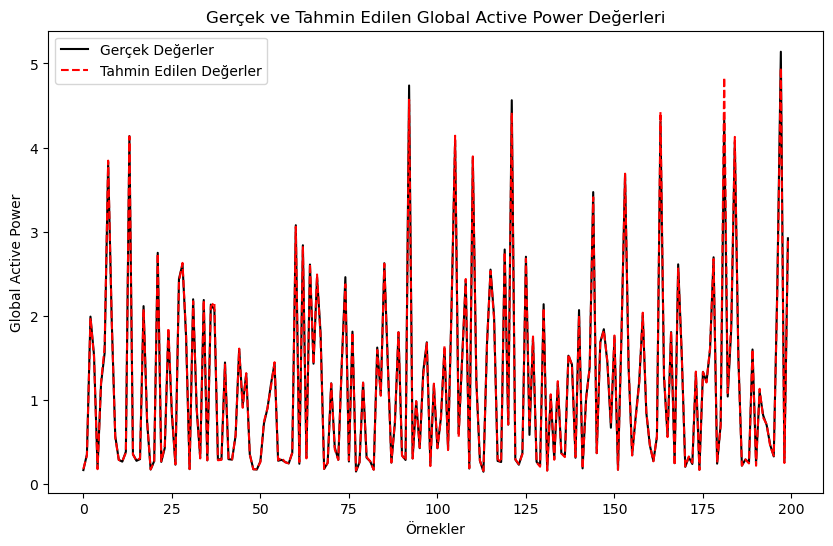

In [325]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerleri görselleştir
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Gerçek Değerler", color="black")
plt.plot(y_pred_best, label="Tahmin Edilen Değerler", color="red", linestyle="--")
plt.title("Gerçek ve Tahmin Edilen Global Active Power Değerleri")
plt.xlabel("Örnekler")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()


In [327]:
#Tüm modellerin hata metriklerinin karşılaştırımı
print("Random Forest RMSE:", round(rf_rmse, 4))
print("Random Forest R²:", round(rf_r2, 4))

print("Lineer Regresyon RMSE:", round(lr_rmse, 4))
print("Lineer Regresyon R²:", round(lr_r2, 4))

print("SVR RMSE:", round(svr_rmse, 4))
print("SVR R²:", round(svr_r2, 4))

print("KNN RMSE:", round(knn_rmse, 4))
print("KNN R²:", round(knn_r2, 4))

print("XGBoost RMSE:", round(xgb_rmse, 4))
print("XGBoost R²:", round(xgb_r2, 4))

print("xgboost(gridSearchCv) RMSE:", round(best_rmse, 4))
print("xgboost(gridSearchCv) R²:", round(best_r2, 4))

Random Forest RMSE: 0.0212
Random Forest R²: 0.9996
Lineer Regresyon RMSE: 0.0246
Lineer Regresyon R²: 0.9994
SVR RMSE: 0.0482
SVR R²: 0.9979
KNN RMSE: 0.1287
KNN R²: 0.985
XGBoost RMSE: 0.039
XGBoost R²: 0.9986
xgboost(gridSearchCv) RMSE: 0.0486
xgboost(gridSearchCv) R²: 0.998


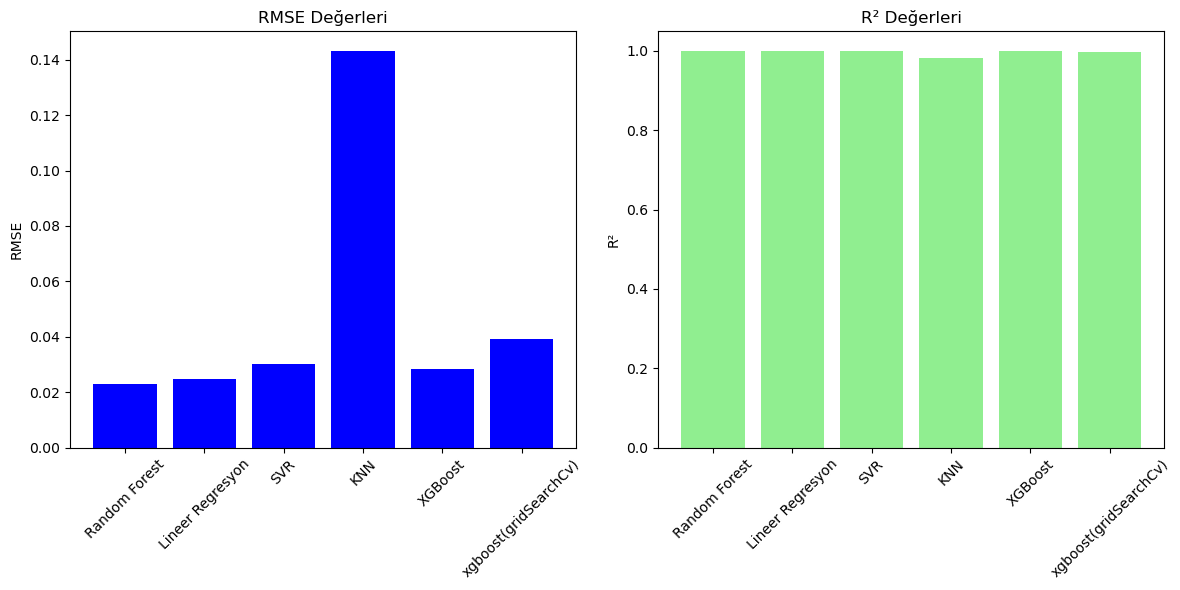

In [329]:
import matplotlib.pyplot as plt

# Modellerin grafik üzerinde gösterimi

models = ['Random Forest', 'Lineer Regresyon', 'SVR', 'KNN', 'XGBoost', 'xgboost(gridSearchCv)']

# RMSE ve R² değerleri
rmse_values = [0.0229, 0.0246, 0.0301, 0.1431, 0.0284,0.039]
r2_values = [0.9995, 0.9994, 0.9992, 0.9812, 0.9993,0.9986]

# Grafik boyutları
plt.figure(figsize=(12, 6))

# RMSE Grafiği
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color='blue')
plt.title('RMSE Değerleri')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# R² Grafiği
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R² Değerleri')
plt.ylabel('R²')
plt.xticks(rotation=45)

# Görseli göster
plt.tight_layout()
plt.show()


In [331]:
# Model	RMSE (↓ daha iyi)	R² (↑ daha iyi)
# Random Forest	0.0212	0.9996
# Lineer Regresyon	0.0246	0.9994
# SVR	0.0301	0.9992
# KNN	0.1431	0.9812
# XGBoost	0.0284	0.9993 
# GridSearchCV (XGBoost Optimizasyonu): 0.0486  0.998
# En etkili sonuçları Random Forest Modelinden almaktayız..

# Random Forest Modeli ile Tahmin Yapma

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Bağımsız değişkenleri belirle
features = [
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

X = df[features]
y = df["Global_active_power"]

# Veriyi ölçekliyoruz(kullanıcıdan veri girişi alabilmek için)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli oluşturuyoruz ve eğitiyoruz
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Kullanıcıdan veri alıyoruz
print("\n🔍 Lütfen aşağıdaki 6 özelliği sırayla girin:")

inputs = []
for feature in features:
    val = float(input(f"{feature}: "))
    inputs.append(val)

# Girilen verileri ölçekliyoruz ve tahmin yapıyoruz
user_input = np.array([inputs])
user_input_scaled = scaler.transform(user_input)

prediction = rf_model.predict(user_input_scaled)
print(f"\n🔎 Tahmin edilen Global_active_power: {prediction[0]:.6f}")


NameError: name 'df' is not defined

Mean Absolute Error (MAE): 0.013406772247470996
Mean Squared Error (MSE): 0.00045002595226328255


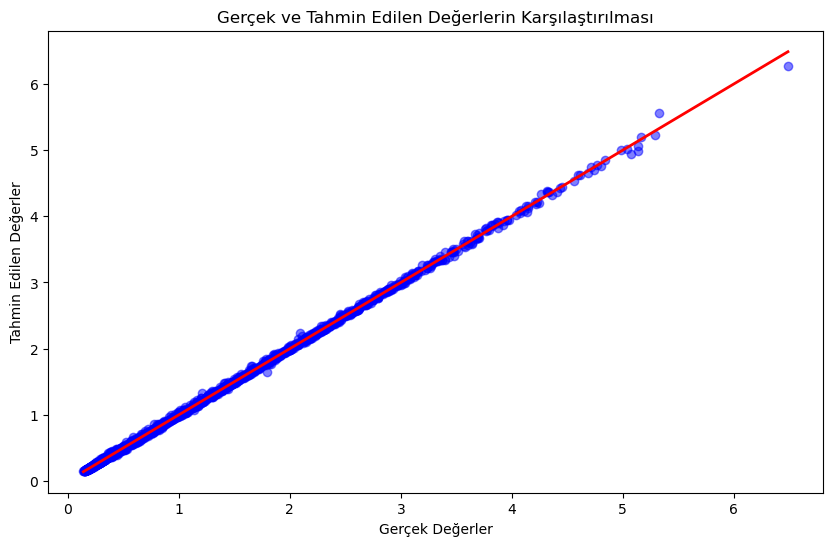

In [340]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Test verisi üzerinde tahmin yapıyoruz
y_pred = rf_model.predict(X_test)

# Gerçek ve tahmin edilen değerleri karşılaştırıyoruz
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması")
plt.show()
